### Steps will be performed in this Notebook 

* Linear Regression
* Linear Regression with Cross Validation
* Ridge Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
california_data = fetch_california_housing()

In [3]:
df = pd.DataFrame(data= california_data.data,columns=california_data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
df['target'] = california_data.target

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


No null / missing values , every features has float datatypes (numerical datatype)

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


* In 'AveRooms' Column seems to have outliers which is showing 141 rooms(that not normal value definately outlier)

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]
print(x.shape,y.shape)

(20640, 8) (20640, 1)


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(14448, 8) (6192, 8) (14448, 1) (6192, 1)


## Linear Regression

In [10]:
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mae =mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
R2_score = r2_score(y_test,y_pred)

print(f"mean_absolute_error : {mae}")
print(f"mean_squared_error: {mse}")
print(f"root_mean_squared_error : {rmse}")
print(f"R2_score : {R2_score}")


mean_absolute_error : 0.5272474538305951
mean_squared_error: 0.5305677824766757
root_mean_squared_error : 0.7284008391515455
R2_score : 0.595770232606166


## Accuracy in  Linear Regression model is 59.5%

## Linear Regression with Cross Validation

In [11]:
model_cv = LinearRegression()
mse = cross_val_score(model_cv,x,y,scoring='neg_mean_squared_error',cv=5)
model_cv.fit(x,y)
mean_mse = np.mean(mse)
print(f"Using Cross Validation mean MSE : {mean_mse}")

Using Cross Validation mean MSE : -0.5582901717686537


Cross Validation MSE mean is -0.558

In [12]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,40,45,50,55,100]}
model_ridge = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
model_ridge.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-10, 1e-08, 0.001, 0.01, 1,
                                   5, 10, 20, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [13]:
print(f"Best Parametr is  : {model_ridge.best_params_} \n Best Score is : {model_ridge.best_score_} ")

Best Parametr is  : {'alpha': 1e-15} 
 Best Score is : -0.5268253746355749 


* Best Parametr is  : {ridge_regression.best_params_} 
* Best Score is : {ridge_regression.best_score_} 

# Lasso Regrssion

In [14]:
lasso = Lasso()
model_lasso = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
model_lasso.fit(x_train,y_train)

C:\Users\IZU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.476e+03, tolerance: 1.535e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\IZU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e+03, tolerance: 1.570e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\IZU\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-10, 1e-08, 0.001, 0.01, 1,
                                   5, 10, 20, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [15]:
print(f"Best Parameter is : {model_lasso.best_params_} \n Best Score : {model_lasso.best_score_}")

Best Parameter is : {'alpha': 1e-08} 
 Best Score : -0.5268253745023912


### Predicting y using linear,cv,ridge and lasso models 

In [16]:
pred_y_linear = model.predict(x_test)
pred_y_cv_linear = model_cv.predict(x_test)
pred_y_ridge = model_ridge.predict(x_test)
pred_y_lasso = model_lasso.predict(x_test)

In [17]:
print(f"linear R^2 Score : {r2_score(y_test,pred_y_linear)}")
print(f"linear cv R^2 Score : {r2_score(y_test,pred_y_cv_linear)}")
print(f"Ridge R^2 Score : {r2_score(y_test,pred_y_ridge)}")
print(f"Lasso R^2 Score : {r2_score(y_test,pred_y_lasso)}")

linear R^2 Score : 0.595770232606166
linear cv R^2 Score : 0.6006082009407812
Ridge R^2 Score : 0.5957702326061665
Lasso R^2 Score : 0.595770242481793


## linear R^2 Score : 0.595770232606166
## linear cv R^2 Score : 0.6006082009407812
## Ridge R^2 Score : 0.5957702326061665
## Lasso R^2 Score : 0.595770242481793

C:\Users\IZU\AppData\Local\Temp\ipykernel_8320\1696833474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred_y_linear)


<Axes: ylabel='Density'>

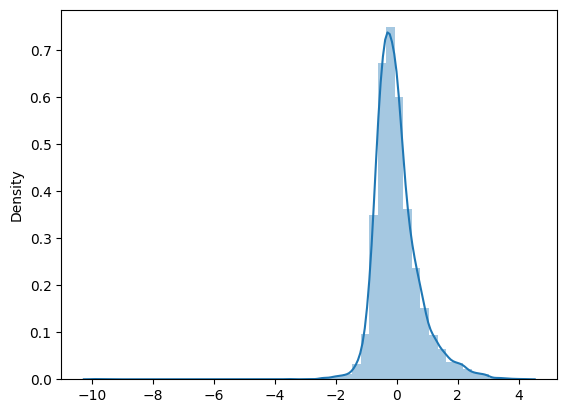

In [18]:
sns.distplot(y_test-pred_y_linear)

C:\Users\IZU\AppData\Local\Temp\ipykernel_8320\555870891.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred_y_cv_linear)


<Axes: ylabel='Density'>

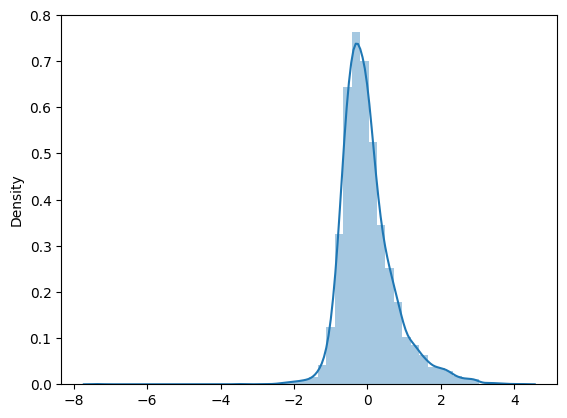

In [19]:
sns.distplot(y_test-pred_y_cv_linear)

C:\Users\IZU\AppData\Local\Temp\ipykernel_8320\290360784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred_y_ridge)


<Axes: ylabel='Density'>

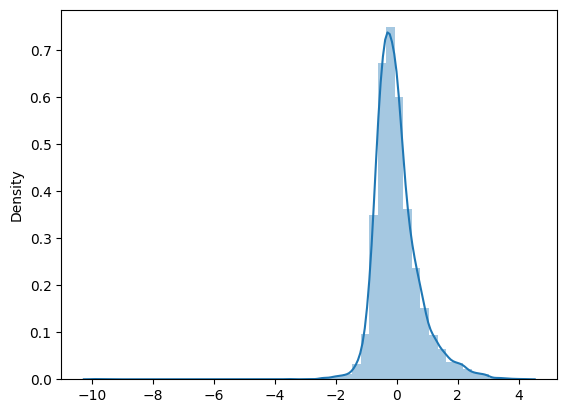

In [20]:
sns.distplot(y_test-pred_y_ridge)